In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [7]:
df =pd.read_csv('/content/1.ushape.csv',header=None,names=['X','y','Class'])
df.head()

,X,y,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


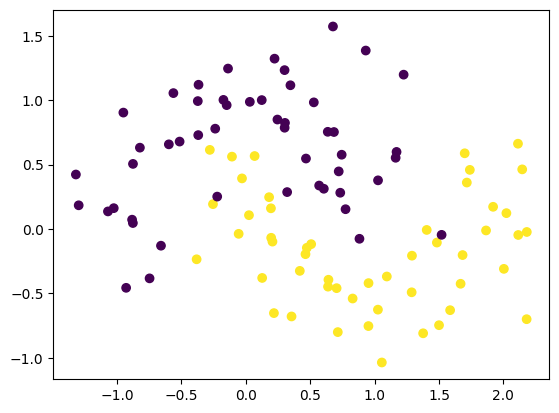

In [11]:
plt.scatter(df['X'],df['y'],c=df['Class'])

In [13]:
X= df[['X','y']].values
y= df['Class'].values

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# Relu Activation with Zero Init weights
m1relu = Sequential()
m1relu.add(Dense(2,input_dim=2,activation='relu'))
m1relu.add(Dense(1,activation='sigmoid'))
m1relu.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
init_weights = m1relu.get_weights()

In [43]:
init_weights[0] = np.zeros(init_weights[0].shape)
init_weights[1] = np.zeros(init_weights[1].shape)
init_weights[2] = np.zeros(init_weights[2].shape)
init_weights[3] = np.zeros(init_weights[3].shape)

In [44]:
init_weights

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.])]

In [45]:
m1relu.set_weights(init_weights)

In [46]:
m1relu.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [47]:
m1relu.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
hist = m1relu.fit(X,y,epochs=100,verbose=0,validation_split=0.2)

In [51]:
m1relu.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00152897], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


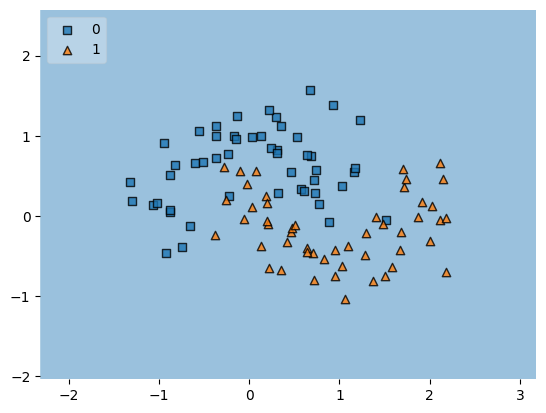

In [53]:
plot_decision_regions(X,y.astype(int),m1relu,legend=2)
plt.show()

In [55]:
# Tanh Activation with Zero Init weights
m10h = Sequential()
m10h.add(Dense(2,input_dim=2,activation='tanh'))
m10h.add(Dense(1,activation='sigmoid'))
m10h.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
init_weights10 = m10h.get_weights()

In [57]:
init_weights[0] = np.zeros(init_weights10[0].shape)
init_weights[1] = np.zeros(init_weights10[1].shape)
init_weights[2] = np.zeros(init_weights10[2].shape)
init_weights[3] = np.zeros(init_weights10[3].shape)

In [59]:
m10h.set_weights(init_weights)

In [60]:
m10h.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [61]:
m10h.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
hist10h = m10h.fit(X,y,epochs=100,verbose=0,validation_split=0.2)

In [64]:
m10h.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00448668], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


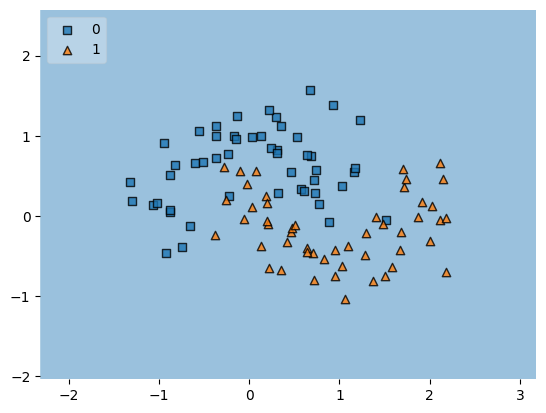

In [65]:
plot_decision_regions(X,y.astype(int),m10h,legend=2)
plt.show()

In [80]:
# SIGMOID Activation with Zero Init weights
msig = Sequential()
msig.add(Dense(10,input_dim=2,activation='sigmoid'))
msig.add(Dense(1,activation='sigmoid'))
msig.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
init_weightssig = msig.get_weights()
init_weightssig

[array([[-0.15149581, -0.03620768, -0.5724036 , -0.51733756,  0.10786474,
         -0.06517249,  0.47742063,  0.32848376, -0.59557474,  0.2557277 ],
        [ 0.5153932 ,  0.6753525 , -0.5194299 ,  0.12633419,  0.31165534,
          0.6579718 , -0.23146611,  0.17078274, -0.63378745, -0.4141823 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.44542244],
        [ 0.58602816],
        [ 0.35245377],
        [ 0.23715156],
        [ 0.62593824],
        [-0.0981648 ],
        [-0.4678298 ],
        [ 0.55477065],
        [-0.01381499],
        [-0.33472824]], dtype=float32),
 array([0.], dtype=float32)]

In [82]:
init_weightssig[0] = np.zeros(init_weightssig[0].shape)
init_weightssig[1] = np.zeros(init_weightssig[1].shape)
init_weightssig[2] = np.zeros(init_weightssig[2].shape)
init_weightssig[3] = np.zeros(init_weightssig[3].shape)

In [83]:
msig.set_weights(init_weightssig)

In [84]:
msig.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
histsig = msig.fit(X,y,validation_split=0.2,epochs=100,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


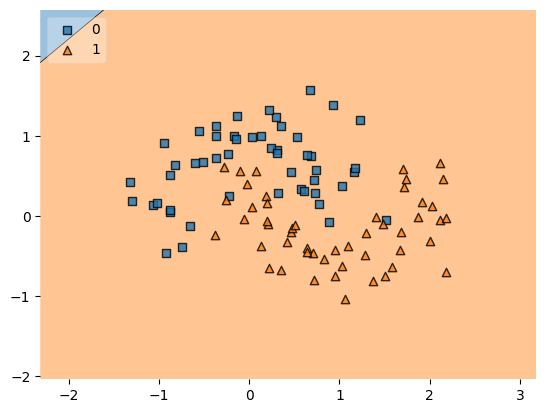

In [86]:
plot_decision_regions(X,y.astype(int),msig,legend=2)
plt.show()

In [87]:
msig.get_weights()

[array([[ 0.44975886,  0.44975886,  0.44975886,  0.44975886,  0.44975886,
          0.44975886,  0.44975886,  0.44975886,  0.44975886,  0.44975886],
        [-0.48190603, -0.48190603, -0.48190603, -0.48190603, -0.48190603,
         -0.48190603, -0.48190603, -0.48190603, -0.48190603, -0.48190603]],
       dtype=float32),
 array([-0.13606259, -0.13606259, -0.13606259, -0.13606259, -0.13606259,
        -0.13606259, -0.13606259, -0.13606259, -0.13606259, -0.13606259],
       dtype=float32),
 array([[0.05548239],
        [0.05548239],
        [0.05548239],
        [0.05548239],
        [0.05548239],
        [0.05548239],
        [0.05548239],
        [0.05548239],
        [0.05548239],
        [0.05548239]], dtype=float32),
 array([-0.06050472], dtype=float32)]

In [98]:
 # Relu Activation with Non Zero Init weights
m1 = Sequential()
m1.add(Dense(2,input_dim=2,activation='sigmoid'))
m1.add(Dense(1,activation='sigmoid'))
print("--------------Summary=-------------\n",m1.summary())
init_m1 = m1.get_weights()
print("--------------Initial Weighjts=-----\n",init_m1 )

init_m1[0] = np.ones(init_m1[0].shape)*0.5
init_m1[1] = np.ones(init_m1[1].shape)*0.5
init_m1[2] = np.ones(init_m1[2].shape)*0.5
init_m1[3] = np.ones(init_m1[3].shape)*0.5
m1.set_weights(init_m1)
print("---------After Set weights= 0.5----------\n",m1.get_weights())


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

--------------Summary=-------------
 None
--------------Initial Weighjts=-----
 [array([[-0.18978107, -1.1123788 ],
       [ 0.34742534,  0.59174836]], dtype=float32), array([0., 0.], dtype=float32), array([[1.2273728],
       [1.1532444]], dtype=float32), array([0.], dtype=float32)]
---------After Set weights= 0.5----------
 [array([[0.5, 0.5],
       [0.5, 0.5]], dtype=float32), array([0.5, 0.5], dtype=float32), array([[0.5],
       [0.5]], dtype=float32), array([0.5], dtype=float32)]


In [101]:
m1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [102]:
histm1 = m1.fit(X,y,validation_split=0.2,epochs=100,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


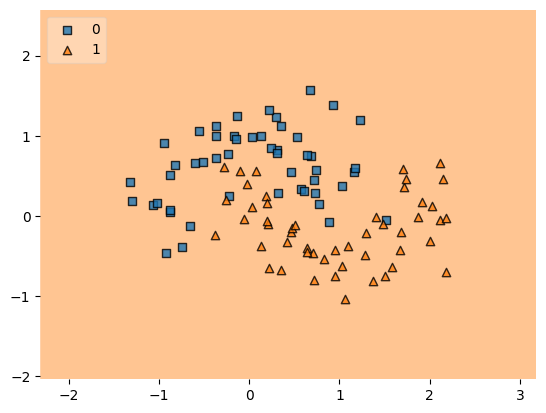

In [103]:
plot_decision_regions(X,y.astype(int),m1,legend=2)
plt.show()

In [104]:
m1.get_weights()

[array([[0.7136874, 0.7136874],
        [0.2437576, 0.2437576]], dtype=float32),
 array([0.27359423, 0.27359423], dtype=float32),
 array([[0.26562598],
        [0.26562598]], dtype=float32),
 array([0.25164193], dtype=float32)]